# Wrangle and Analyse Data



<ul>
<li><a href="#intro"><b>Introduction</b></a></li>
<li><a href="#gather"><b>Gathering Data</b></a>
    <ul>
        <li><a href="#archive">Twitter Archive</a></li>
        <li><a href="#predictions">Image Predictions</a></li>
        <li><a href="#json">Twitter API and JSON</a></li>
    </ul>
<li><a href="#assess"><b>Assessing Data</b></a>
    <ul>
        <li><a href="#archive_assess">Assessing the twitter archive data</a></li>
        <li><a href="#predictions_assess">Assessing the Image predictions data</a></li>
        <li><a href="#api">Assessing the Twitter API Data</a></li>
        <li><a href="#quality">Quality</a></li>
        <li><a href="#tidiness">Tidiness</a></li>
    </ul>
<li><a href="#clean"><b>Cleaning the Data</b></a></li>
<li><a href="#analysis"><b>Analysis & Visualization</b></a></li>
</ul>

<a id='intro'></a>
## Introduction
Real-world data rarely comes clean. Using Python and its libraries, I will gather data from a variety of sources and in a variety of formats, assess its quality and tidiness, then clean it. This is called data wrangling. I will document my wrangling efforts in this Jupyter Notebook, plus showcase them through analyses and visualizations using Python (and its libraries) and/or SQL.

The dataset that I will be wrangling (and analyzing and visualizing) is the tweet archive of Twitter user @dog_rates, also known as WeRateDogs. WeRateDogs is a Twitter account that rates people's dogs with a humorous comment about the dog.

## Importing libraries

In [317]:
## Importing libraries
import pandas as pd 
import numpy as np
import requests
import tweepy
from tweepy import OAuthHandler
import json
import seaborn as sns
from functools import reduce
import matplotlib.pyplot as plt
from timeit import default_timer as timer
from IPython.display import Image

%matplotlib inline

<a id='gather'></a>
## Gathering Data

- **WeRateDogs Twitter archive:-** This file can be downloaded from the link given in the portal

- **Tweet image predictions:-** Indicates what breed of dog (or other object, animal, etc.) is present in each tweet according to a neural network. This file (image_predictions.tsv) is hosted on Udacity's servers and should be downloaded programmatically using the Requests library and the following URL: https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv

- **Tweet's JSON Data:-** Using the tweet IDs in the WeRateDogs Twitter archive, we can query the Twitter API for each tweet's JSON data using Python's Tweepy library and store each tweet's entire set of JSON data in a file called tweet_json.txt file.

<a id='archive'></a>
**1.Twitter archive file**
- In this section we read the given csv file and take a look at the first few rows.

In [19]:
#Read CSV file 
twitter_archive_df = pd.read_csv('twitter-archive-enhanced.csv')
twitter_archive_df.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None


<a id='predictions'></a>
**2.Image prediction**
- Here,I fetch the data from the given url using requests library,read that tsv file and display first few rows.

In [14]:
url="https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(url)
with open('image_predictions.tsv', 'wb') as file:
    file.write(response.content)
    
image_predictions_df = pd.read_csv('image_predictions.tsv', sep='\t')
image_predictions_df.head(2)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True


<a id='json'></a>
**3.Twitter API & JSON**
- In this section,I get data from Twitter API in the form JSON file.Then I read that JSON file line by line to get the <font color='green'>**tweet_id,favourite_count & retweet_count**</font> and the finally display it in the form of a data frame.

In [5]:
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)


In [16]:
# Loading data from the JSON file to dataframe
templist = []

with open('tweet_json.txt', 'r') as f:
    for line in f:
        tweet_line = json.loads(line)
        templist.append({'tweet_id': tweet_line['id'],
                        'favorite_count': tweet_line['favorite_count'],
                        'retweet_count': tweet_line['retweet_count']})
        
twitter_api_df = pd.DataFrame(templist)
twitter_api_df.head()

,favorite_count,retweet_count,tweet_id
0,39467,8853,892420643555336193
1,33819,6514,892177421306343426
2,25461,4328,891815181378084864
3,42908,8964,891689557279858688
4,41048,9774,891327558926688256


<a id='assess'></a>
## Assessing Data

<a id='archive_assess'></a>
**1. Assessing the twitter archive data**

In [56]:
twitter_archive_df.sample(15)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
135,866450705531457537,NaN,NaN,2017-05-22 00:28:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Jamesy. He gives a kiss to every other...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/866450705...,13,10,Jamesy,None,None,pupper,None
2333,666337882303524864,NaN,NaN,2015-11-16 19:31:45 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is an extremely rare horned Parthenon. No...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666337882...,9,10,an,None,None,None,None
461,817536400337801217,NaN,NaN,2017-01-07 01:00:41 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Eugene &amp; Patti Melt. No matte...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/817536400...,12,10,Eugene,None,None,None,None
2264,667538891197542400,NaN,NaN,2015-11-20 03:04:08 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",This is a southwest Coriander named Klint. Hat...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667538891...,9,10,a,None,None,None,None
1573,687494652870668288,NaN,NaN,2016-01-14 04:41:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Marq. He stole this car. 7/10 wtf Marq...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/687494652...,7,10,Marq,None,None,None,None
1666,682697186228989953,NaN,NaN,2015-12-31 22:57:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",NAAAAAAA ZAPENYAAAAA MABADI-CHIBAWAAA 12/10 ht...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/682697186...,12,10,None,None,None,None,None
1376,701805642395348998,NaN,NaN,2016-02-22 16:27:58 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",Please pray for this pupper. Nothing wrong wit...,NaN,NaN,NaN,https://vine.co/v/ivV6Y37mH5Z,11,10,None,None,None,pupper,None
580,800459316964663297,NaN,NaN,2016-11-20 22:02:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a very sleepy pupper. Appears to be por...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/800459316...,12,10,None,None,None,pupper,None
1541,689623661272240129,NaN,NaN,2016-01-20 01:41:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Lucy. She's terrified of the stuffed b...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/689623661...,10,10,Lucy,None,None,pupper,None
486,814530161257443328,NaN,NaN,2016-12-29 17:54:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Alf. Someone just rubbed a balloon on ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/814530161...,12,10,Alf,None,None,None,None


In [21]:
rows=twitter_archive_df.shape[0]
columns=twitter_archive_df.shape[1]

print 'Number of Rows=%d\nNumber of columns=%d'%(rows,columns)

Number of Rows=2356
Number of columns=17


In [22]:
twitter_archive_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [23]:
twitter_archive_df.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [41]:
twitter_archive_df.duplicated().sum()

0

In [28]:
twitter_archive_df.isna().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [55]:
twitter_archive_df.query('rating_denominator!=10')['rating_denominator']

313       0
342      15
433      70
516       7
784      11
902     150
1068     11
1120    170
1165     20
1202     50
1228     90
1254     80
1274     50
1351     50
1433     40
1598     20
1634    130
1635    110
1662     11
1663     16
1779    120
1843     80
2335      2
Name: rating_denominator, dtype: int64

<a id='predictions_assess'></a>
**2. Assessing the Image predictions data**

In [57]:
image_predictions_df.sample(50)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1040,712092745624633345,https://pbs.twimg.com/media/CeHckpuW4AAF7rT.jpg,1,triceratops,0.235373,False,llama,0.153126,False,three-toed_sloth,1.118400e-01,False
1264,749064354620928000,https://pbs.twimg.com/media/CmU2DVWWgAArvp3.jpg,2,pug,0.985222,True,Brabancon_griffon,0.003314,True,Pekinese,2.988880e-03,True
31,666421158376562688,https://pbs.twimg.com/media/CT-aggCXAAIMfT3.jpg,1,Blenheim_spaniel,0.906777,True,cocker_spaniel,0.090346,True,Shih-Tzu,1.116870e-03,True
492,675706639471788032,https://pbs.twimg.com/media/CWCXj35VEAIFvtk.jpg,1,English_springer,0.990300,True,Welsh_springer_spaniel,0.002080,True,cocker_spaniel,2.013780e-03,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,6.895690e-02,True
1704,817415592588222464,https://pbs.twimg.com/media/C1gLJVpWgAApI3r.jpg,1,Doberman,0.806163,True,black-and-tan_coonhound,0.097386,True,miniature_pinscher,8.599280e-02,True
404,673705679337693185,https://pbs.twimg.com/media/CVl7u00WcAAufzR.jpg,1,Shih-Tzu,0.165383,True,Lhasa,0.116977,True,Yorkshire_terrier,6.389890e-02,True
699,684594889858887680,https://pbs.twimg.com/media/CYAra7JWsAACPZH.jpg,1,Weimaraner,0.948688,True,English_setter,0.035352,True,Brittany_spaniel,3.878780e-03,True
923,702276748847800320,https://pbs.twimg.com/media/Cb78-nOWIAENNRc.jpg,1,Boston_bull,0.697303,True,French_bulldog,0.239015,True,American_Staffordshire_terrier,1.983810e-02,True
637,681261549936340994,https://pbs.twimg.com/media/CXRTw_5WMAAUDVp.jpg,1,Tibetan_terrier,0.382101,True,miniature_poodle,0.095429,True,Maltese_dog,6.573770e-02,True


In [30]:
rows=image_predictions_df.shape[0]
columns=image_predictions_df.shape[1]

print 'Number of Rows=%d\nNumber of columns=%d'%(rows,columns)

Number of Rows=2075
Number of columns=12


In [33]:
image_predictions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.0+ KB


In [34]:
image_predictions_df.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [40]:
image_predictions_df.duplicated().sum()

0

In [38]:
image_predictions_df.isna().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

In [39]:
image_predictions_df['jpg_url'].duplicated().sum()

66

<a id='api'></a>
**3. Assessing the Twitter API Data**

In [42]:
twitter_api_df.sample(5)

,favorite_count,retweet_count,tweet_id
1137,4479,1219,728015554473250816
1854,1122,316,675522403582218240
220,32390,8404,849776966551130114
2261,917,568,667544320556335104
393,14025,2848,825829644528148480


In [43]:
rows=twitter_api_df.shape[0]
columns=twitter_api_df.shape[1]

print 'Number of Rows=%d\nNumber of columns=%d'%(rows,columns)

Number of Rows=2354
Number of columns=3


In [44]:
twitter_api_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
favorite_count    2354 non-null int64
retweet_count     2354 non-null int64
tweet_id          2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


In [45]:
twitter_api_df.describe()

,favorite_count,retweet_count,tweet_id
count,2354.000000,2354.000000,2.354000e+03
mean,8080.968564,3164.797366,7.426978e+17
std,11814.771334,5284.770364,6.852812e+16
min,0.000000,0.000000,6.660209e+17
25%,1415.000000,624.500000,6.783975e+17
50%,3603.500000,1473.500000,7.194596e+17
75%,10122.250000,3652.000000,7.993058e+17
max,132810.000000,79515.000000,8.924206e+17


In [46]:
twitter_api_df.duplicated().sum()

0

In [48]:
twitter_api_df.isna().sum()

favorite_count    0
retweet_count     0
tweet_id          0
dtype: int64

<a id='quality'></a>
### Quality

#### **Twitter Archive Table**
#### Visual Assessment
<ol>
<li>rating_numerator should not have values greater than 10 as rating_denominator is 10.</li>
<li>rating_denominator should have all the values 10.But there are values other than 10 also.</li>
<li>timestamp column contains +0000 which looks redundant.</li>
<li>Some of the names mentioned in the dogs column is actually not the name such as a,an etc.</li>
<li> In some of the columns there is None instead of NaN such as <b>name,doggo,floofer,pupper,puppo</b> columns</li>
</ol>

#### Programmatic Assessment
<ol start='6'>
<li>tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_user_id,retweeted_status_id columns are int but it should be str.</li>
<li>timestamp,retweeted_status_timestamp columns are object instead of datetime.</li>
<li>in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls contains null values.</li>
<li>Twitter archive table has more number or rows than twitter api table

</ol>



#### **`Image Predictions Table`**

<ol>1.datatype of tweet_id is int,which should be str.</ol>


<a id='tidiness'></a>
## **Tidiness**
<ol>
<li>.Melt all the four columns of dogs name in `twitter archive table`</li>
<li> text column in `twitter archive table` should be split into two different columns i.e text and url.</li>
<li>Certain rows in extended urls columns contains two observations i.e two urls in `twitter archive table`.</li>
</ol>



<a id='clean'></a>
## Cleaning Data

In [237]:
### Making a copy of the data frames
twitter_archive_clean = twitter_archive_df.copy()
image_predictions_clean = image_predictions_df.copy()
twitter_api_clean = twitter_api_df.copy()

**Define**
- Merge the all the DataFrames.

**Code**


In [238]:
## Merge the twitter archive,image predictions and twitter api dataframes
dfs = [twitter_archive_clean, image_predictions_clean, twitter_api_clean]
twitter_df = reduce(lambda left,right: pd.merge(left,right,on='tweet_id'), dfs)

**Test**

In [239]:
twitter_df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,0.097049,False,bagel,0.085851,False,banana,0.076110,False,39467,8853
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,33819,6514
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,25461,4328
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,...,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,42908,8964
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,...,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,41048,9774


In [240]:
twitter_df.columns

Index([u'tweet_id', u'in_reply_to_status_id', u'in_reply_to_user_id',
       u'timestamp', u'source', u'text', u'retweeted_status_id',
       u'retweeted_status_user_id', u'retweeted_status_timestamp',
       u'expanded_urls', u'rating_numerator', u'rating_denominator', u'name',
       u'doggo', u'floofer', u'pupper', u'puppo', u'jpg_url', u'img_num',
       u'p1', u'p1_conf', u'p1_dog', u'p2', u'p2_conf', u'p2_dog', u'p3',
       u'p3_conf', u'p3_dog', u'favorite_count', u'retweet_count'],
      dtype='object')

**Define**
- Combine dog stages into one column.

**Code**

In [241]:
# Createing and mergeing dog stages into one column
twitter_df['dogs_stages'] = twitter_df.text.str.extract('(doggo|floofer|pupper|puppo)', expand = True)

# Droping the unnecessary columns
twitter_df.drop(['doggo','floofer','pupper','puppo'], axis=1, inplace = True)

**Test**

In [242]:
twitter_df['dogs_stages'].value_counts().sum()

337

**Define**
-  Replacing names that are not likely to be  real such as 'a', 'an' etc.We can see all such names start with lower latter.


**Code**

In [243]:
print twitter_df.name.value_counts()
twitter_df['name']=twitter_df['name'].replace(to_replace = "^[a-z]+[A-Z]*", value = 'None', regex = True)

None         577
a             55
Charlie       11
Lucy          10
Penny         10
Tucker        10
Cooper        10
Oliver        10
Bo             8
Sadie          8
Lola           8
Winston        8
Toby           7
an             7
Daisy          7
the            7
Jax            6
Dave           6
Scout          6
Stanley        6
Bella          6
Rusty          6
Koda           6
Bailey         6
Milo           6
Louis          5
Oscar          5
Buddy          5
Chester        5
Leo            5
            ... 
Godzilla       1
Pavlov         1
Suki           1
Creg           1
Maisey         1
Bronte         1
Blitz          1
Clyde          1
Zooey          1
Livvie         1
Brudge         1
Lili           1
Grizzie        1
Mollie         1
Snoop          1
Lenox          1
Jeremy         1
Philbert       1
Todo           1
Meatball       1
Kanu           1
Dawn           1
Steve          1
Laika          1
Socks          1
Eazy           1
Kane           1
Finnegus      

**Test**

In [244]:
twitter_df.name.value_counts()

None         677
Charlie       11
Cooper        10
Penny         10
Lucy          10
Tucker        10
Oliver        10
Sadie          8
Bo             8
Lola           8
Winston        8
Daisy          7
Toby           7
Dave           6
Bella          6
Rusty          6
Bailey         6
Milo           6
Koda           6
Jax            6
Scout          6
Stanley        6
Alfie          5
Chester        5
Buddy          5
Louis          5
Oscar          5
Leo            5
Larry          5
Clarence       4
            ... 
Chadrick       1
Berkeley       1
Jonah          1
Bobb           1
Ziva           1
Callie         1
Finnegus       1
Kane           1
Eazy           1
Socks          1
Sprinkles      1
Oshie          1
Clyde          1
Livvie         1
Brudge         1
Lili           1
Grizzie        1
Mollie         1
Snoop          1
Lenox          1
Jeremy         1
Philbert       1
Zooey          1
Jerome         1
Todo           1
Kanu           1
Dawn           1
Steve         

**Define**
- Replace 'None' dog stages by None

**Code**

In [245]:
twitter_df['dogs_stages'] = twitter_df['dogs_stages'].replace(to_replace ='None', value = None, regex = True)

**Test**

In [246]:
twitter_df.dogs_stages.head(10)

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
5      NaN
6      NaN
7      NaN
8      NaN
9    doggo
Name: dogs_stages, dtype: object

**Define**
- Dropping the unwanted columns

**Code**

In [247]:
twitter_df.columns


Index([u'tweet_id', u'in_reply_to_status_id', u'in_reply_to_user_id',
       u'timestamp', u'source', u'text', u'retweeted_status_id',
       u'retweeted_status_user_id', u'retweeted_status_timestamp',
       u'expanded_urls', u'rating_numerator', u'rating_denominator', u'name',
       u'jpg_url', u'img_num', u'p1', u'p1_conf', u'p1_dog', u'p2', u'p2_conf',
       u'p2_dog', u'p3', u'p3_conf', u'p3_dog', u'favorite_count',
       u'retweet_count', u'dogs_stages'],
      dtype='object')

In [248]:
drop_columns=['in_reply_to_status_id','in_reply_to_user_id',\
              'retweeted_status_id','retweeted_status_user_id',\
              'retweeted_status_timestamp','p1_conf','p1_dog', 'p2_conf',\
              'p2_dog', 'p3_conf','p3_dog']
twitter_df.drop(drop_columns, axis=1, inplace=True)

**Test**

In [249]:
twitter_df.head(50)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,jpg_url,img_num,p1,p2,p3,favorite_count,retweet_count,dogs_stages
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,bagel,banana,39467,8853,NaN
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,Pekinese,papillon,33819,6514,NaN
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,malamute,kelpie,25461,4328,NaN
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,Labrador_retriever,spatula,42908,8964,NaN
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,English_springer,German_short-haired_pointer,41048,9774,NaN
5,891087950875897856,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13,10,None,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,1,Chesapeake_Bay_retriever,Irish_terrier,Indian_elephant,20562,3261,NaN
6,890971913173991426,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,1,Appenzeller,Border_collie,ice_lolly,12041,2158,NaN
7,890729181411237888,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,13,10,None,https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg,2,Pomeranian,Eskimo_dog,Pembroke,56848,16716,NaN
8,890609185150312448,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,https://pbs.twimg.com/media/DFwUU__XcAEpyXI.jpg,1,Irish_terrier,Irish_setter,Chesapeake_Bay_retriever,28226,4429,NaN
9,890240255349198849,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,1,Pembroke,Cardigan,Chihuahua,32467,7711,doggo


**Define**
- Converting the columns into proper datatypes

**code**

In [250]:
twitter_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2072
Data columns (total 16 columns):
tweet_id              2073 non-null int64
timestamp             2073 non-null object
source                2073 non-null object
text                  2073 non-null object
expanded_urls         2073 non-null object
rating_numerator      2073 non-null int64
rating_denominator    2073 non-null int64
name                  2073 non-null object
jpg_url               2073 non-null object
img_num               2073 non-null int64
p1                    2073 non-null object
p2                    2073 non-null object
p3                    2073 non-null object
favorite_count        2073 non-null int64
retweet_count         2073 non-null int64
dogs_stages           337 non-null object
dtypes: int64(6), object(10)
memory usage: 275.3+ KB


In [251]:
twitter_df['timestamp']= pd.to_datetime(twitter_df['timestamp'])
twitter_df['tweet_id'] = twitter_df['tweet_id'].astype(str)
twitter_df['dogs_types'] = twitter_df['dogs_stages'].astype('category')

In [252]:
twitter_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2072
Data columns (total 17 columns):
tweet_id              2073 non-null object
timestamp             2073 non-null datetime64[ns]
source                2073 non-null object
text                  2073 non-null object
expanded_urls         2073 non-null object
rating_numerator      2073 non-null int64
rating_denominator    2073 non-null int64
name                  2073 non-null object
jpg_url               2073 non-null object
img_num               2073 non-null int64
p1                    2073 non-null object
p2                    2073 non-null object
p3                    2073 non-null object
favorite_count        2073 non-null int64
retweet_count         2073 non-null int64
dogs_stages           337 non-null object
dogs_types            337 non-null category
dtypes: category(1), datetime64[ns](1), int64(5), object(10)
memory usage: 277.5+ KB


**Saving the cleaned data into csv**

**Define**
- Converting all values in rating_denominator to 10

**Code**

In [253]:
twitter_df['rating_denominator']=10

**Test**

In [254]:
twitter_df['rating_denominator'].head()

0    10
1    10
2    10
3    10
4    10
Name: rating_denominator, dtype: int64

In [255]:
twitter_df.to_csv('twitter_master.csv', index=False)

<a id='analysis'></a>
## Analyzing & Visualizing Data

### Relation between Retweets & Likes?

In [256]:
df=pd.read_csv('twitter_master.csv')
df.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,jpg_url,img_num,p1,p2,p3,favorite_count,retweet_count,dogs_stages,dogs_types
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,bagel,banana,39467,8853,NaN,NaN
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,Pekinese,papillon,33819,6514,NaN,NaN
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,malamute,kelpie,25461,4328,NaN,NaN
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,Labrador_retriever,spatula,42908,8964,NaN,NaN
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,English_springer,German_short-haired_pointer,41048,9774,NaN,NaN


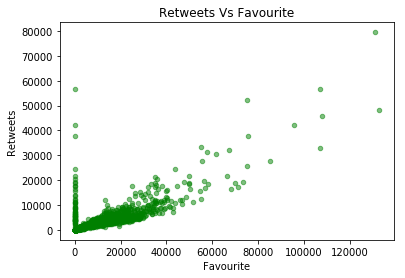

In [413]:
#Retweets vs. Favourites
df.plot(kind='scatter',x='favorite_count',y='retweet_count', alpha = 0.5, color = 'green');
plt.xlabel('Favourite');
plt.ylabel('Retweets');
plt.title('Retweets Vs Favourite');

**The scatter plot above shows that the Retweet_count and Favourite count are directly proportional.**

**Most common names for the dogs?**

In [265]:
df.name.value_counts().head(50)

None        677
Charlie      11
Cooper       10
Penny        10
Lucy         10
Tucker       10
Oliver       10
Sadie         8
Bo            8
Lola          8
Winston       8
Daisy         7
Toby          7
Dave          6
Bella         6
Rusty         6
Bailey        6
Milo          6
Koda          6
Jax           6
Scout         6
Stanley       6
Alfie         5
Chester       5
Buddy         5
Louis         5
Oscar         5
Leo           5
Larry         5
Clarence      4
Scooter       4
Sophie        4
Finn          4
Oakley        4
Bentley       4
Ruby          4
Brody         4
Jerry         4
Bruce         4
Walter        4
Archie        4
George        4
Maggie        4
Chip          4
Dexter        4
Loki          4
Winnie        4
Reggie        4
Sunny         4
Phil          4
Name: name, dtype: int64

**Most common name for the dogs include Charlie,cooper,panie etc**

**Most Favourite breeds?**

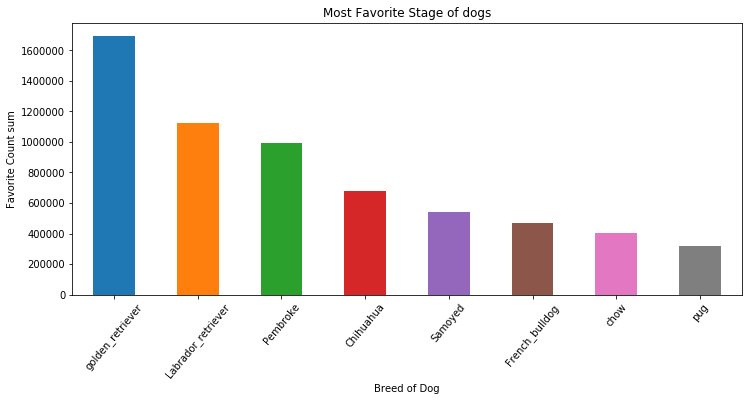

In [409]:
fig= plt.figure(figsize=(12,5))
df.groupby('p1')['favorite_count'].sum().sort_values(ascending=False).head(8).plot(kind='bar');
plt.xlabel('Breed of Dog')
plt.xticks(rotation=50)
plt.ylabel('Favorite Count sum')
plt.title('Most Favorite Breed of dogs');


**Golden Retriever is found to be the most favourite breed.Then next come the Labrador Retriever**

**Most rated dog?**

In [343]:
dog_rated = df['rating_numerator'].sort_values(ascending=False).head(1)
print dog_rated
df.query('rating_numerator=="1776"')

802    1776
Name: rating_numerator, dtype: int64


,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,jpg_url,img_num,p1,p2,p3,favorite_count,retweet_count,dogs_stages,dogs_types
802,749981277374128128,2016-07-04 15:00:45,"<a href=""https://about.twitter.com/products/tw...",This is Atticus. He's quite simply America af....,https://twitter.com/dog_rates/status/749981277...,1776,10,Atticus,https://pbs.twimg.com/media/CmgBZ7kWcAAlzFD.jpg,1,bow_tie,sunglasses,sunglass,5569,2772,NaN,NaN


**The most rated dog is Atticus with rating 1776/10**

**Image of the most rated dog**

In [390]:
most_rated=df.query('rating_numerator=="1776"')['jpg_url']
most_rated=list(most_rated)
Image(url= t[0], width=200, height=200)

**Most favourite dog**

In [348]:
dog_favorite = df['favorite_count'].sort_values(ascending=False).head(1)
print dog_favorite
df.query('favorite_count=="132810"')

329    132810
Name: favorite_count, dtype: int64


,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,jpg_url,img_num,p1,p2,p3,favorite_count,retweet_count,dogs_stages,dogs_types
329,822872901745569793,2017-01-21 18:26:02,"<a href=""http://twitter.com/download/iphone"" r...",Here's a super supportive puppo participating ...,https://twitter.com/dog_rates/status/822872901...,13,10,None,https://pbs.twimg.com/media/C2tugXLXgAArJO4.jpg,1,Lakeland_terrier,Labrador_retriever,Irish_terrier,132810,48265,puppo,puppo


**Most favourite dog has 132810 favourite count.

**Image of the most favourite dog**

In [354]:
most_favourite=df.query('favorite_count=="132810"')['jpg_url']
most_favourite=list(most_favourite)
Image(url= t[0], width=170, height=150)

**Most favourite Stage of dogs**

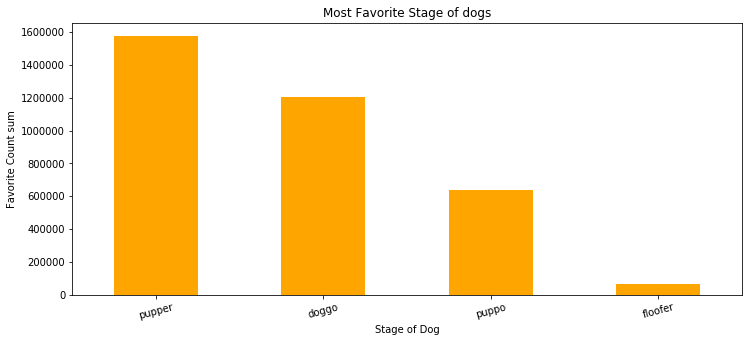

In [408]:
fig= plt.figure(figsize=(12,5))
labels = ['Pupper', 'Doggo', 'Puppo', 'Floofer']
df.groupby(['dogs_types']).favorite_count.sum().sort_values(ascending=False).plot(kind='bar',color='orange')
plt.xlabel('Stage of Dog')
ax.set_xticklabels(labels)
plt.xticks(rotation=15)
plt.ylabel('Favorite Count sum')
plt.title('Most Favorite Stage of dogs');


**Pupper is the most favourite stage of dog.Then next comes the doggo**

**Favorite Counts have increased over the years ?**

In [377]:
df['date'] = pd.DatetimeIndex(df.timestamp).normalize()
df['year'] = df['date'].dt.year
df.groupby('year').count()[['favorite_count','retweet_count']]

,favorite_count,retweet_count
year,,
2015,665,665
2016,1022,1022
2017,386,386


C:\Users\ptkr\AppData\Local\Continuum\anaconda_2\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log10
  


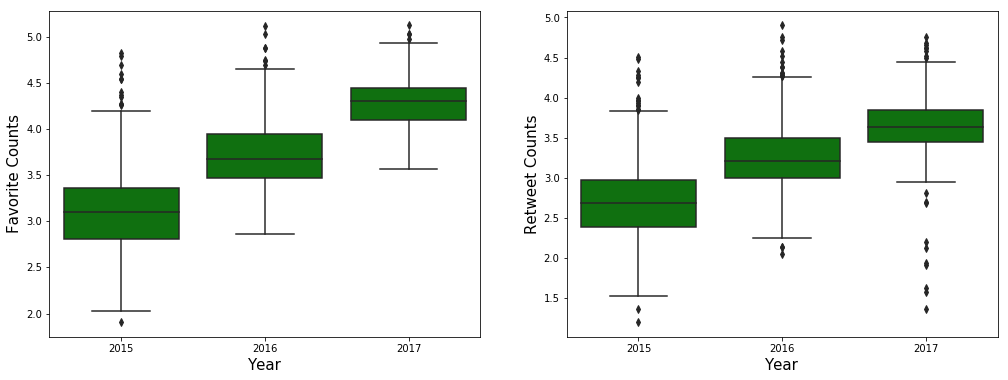

In [393]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize = (17,6))
sns.boxplot(x = df['year'],y = np.log10(df['favorite_count']),ax = ax1,color='green');
sns.boxplot(x = df['year'], y = np.log10(df['retweet_count']),ax = ax2,color='green');
ax1.set_xlabel('Year',fontsize = 15);
ax1.set_ylabel('Favorite Counts',fontsize = 15);
ax2.set_xlabel('Year',fontsize = 15);
ax2.set_ylabel('Retweet Counts',fontsize = 15);

**From the box plot above we can see that the favourite counts have increased over the years.**
